In [1]:
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

employment_status = pd.read_csv('datasets/D_work.csv')
retirement_status = pd.read_csv('datasets/D_pens.csv')
clients = pd.read_csv('datasets/D_clients.csv')
target = pd.read_csv('datasets/D_target.csv')
jobs_description = pd.read_csv('datasets/D_job.csv')
salary = pd.read_csv('datasets/D_salary.csv').drop_duplicates(inplace=False)
credit = pd.read_csv('datasets/D_last_credit.csv')
loan_status = pd.read_csv('datasets/D_loan.csv').merge(pd.read_csv('datasets/D_close_loan.csv'), on='ID_LOAN', validate='one_to_one')

In [27]:
clients_extended = (
    clients
    .merge(salary, left_on='ID', right_on='ID_CLIENT', validate='one_to_one', how='left')
    .drop('ID_CLIENT', axis=1)
    .merge(jobs_description, left_on='ID', right_on='ID_CLIENT', validate='one_to_one', how='left')
    .drop('ID_CLIENT', axis=1)
    .merge(target, left_on='ID', right_on='ID_CLIENT', validate='one_to_one', how='left')
    .drop('ID_CLIENT', axis=1)
    # .merge(credit, left_on='ID', right_on='ID_CLIENT', how='left')
    # .merge(loan_status, left_on='ID', right_on='ID_CLIENT', how='left')
    # .drop('ID_CLIENT', axis=1)
)


clients_loans = (
    clients_extended
    .merge(credit, left_on='ID', right_on='ID_CLIENT', how='left')
    .drop('ID_CLIENT', axis=1)
    .merge(loan_status, left_on='ID', right_on='ID_CLIENT', how='left')
    .drop('ID_CLIENT', axis=1)
)

clients_extended.columns = [col_name.lower() for col_name in clients_extended.columns]


clients_extended['gender_desc'] = clients_extended['gender'].map({1:'Мужчина', 0:'Женщина'})
clients_extended['employment_status'] = clients_extended['socstatus_work_fl'].map({1:'Работает', 0:'Не работает'})
clients_extended['retirement_status'] = clients_extended['socstatus_pens_fl'].map({1:'Пенсионер', 0:'Не пенсионер'})
clients_extended['retirement_status'] = clients_extended['fl_presence_fl'].map({1:'Есть квартира', 0:'Нет квартиры'})

clients_extended

id  age  gender            education      marital_status  \
0      106805103   42       1              Среднее  Не состоял в браке   
1      106809308   28       1  Среднее специальное      Состою в браке   
2      106805867   64       0  Среднее специальное      Состою в браке   
3      106808779   54       1  Среднее специальное      Состою в браке   
4      106814289   26       0  Среднее специальное      Состою в браке   
...          ...  ...     ...                  ...                 ...   
15995  106814680   26       1              Среднее  Не состоял в браке   
15996  106812464   26       0  Среднее специальное      Состою в браке   
15997  106809255   30       1  Среднее специальное  Не состоял в браке   
15998  106814593   25       0  Среднее специальное      Состою в браке   
15999  106813640   26       1               Высшее  Не состоял в браке   

       child_total  dependants  socstatus_work_fl  socstatus_pens_fl  \
0                1           0                  1                  0   
1                1           1                  1                  0   
2                2           0                  1                  1   
3                0           0                  1                  0   
4                1           1                  1                  0   
...            ...         ...                ...                ...   
15995            1           1                  1                  0   
15996            0           0                  1                  0   
15997            0           0                  1                  0   
15998            0           0                  1                  0   
15999            0           0                  1                  0   

        reg_address_province  ... personal_income            gen_industry  \
0         Московская область  ...         25000.0            Другие сферы   
1          Читинская область  ...         10000.0                Торговля   
2          Иркутская область  ...         30000.0            Другие сферы   
3      Новосибирская область  ...         25000.0  Государственная служба   
4          Красноярский край  ...         15000.0            Другие сферы   
...                      ...  ...             ...                     ...   
15995                Чувашия  ...          8000.0  Сборочные производства   
15996                Карелия  ...         12000.0                Торговля   
15997   Белгородская область  ...          9000.0                Торговля   
15998     Кабардино-Балкария  ...         12000.0               Транспорт   
15999              Татарстан  ...         10500.0            Другие сферы   

                        gen_title                        job_dir work_time  \
0            Работник сферы услуг  Участие в основ. деятельности       3.0   
1                      Специалист  Участие в основ. деятельности       5.0   
2      Руководитель высшего звена  Участие в основ. деятельности     360.0   
3                      Специалист  Участие в основ. деятельности       3.0   
4                      Специалист  Участие в основ. деятельности      12.0   
...                           ...                            ...       ...   
15995                  Специалист  Участие в основ. деятельности      36.0   
15996                  Специалист  Участие в основ. деятельности      24.0   
15997                  Специалист  Участие в основ. деятельности      36.0   
15998                  Специалист  Участие в основ. деятельности      36.0   
15999                     Рабочий    Вспомогательный техперсонал      12.0   

       agreement_rk target gender_desc employment_status  retirement_status  
0        60099204.0    1.0     Мужчина          Работает      Есть квартира  
1        62244665.0    0.0     Мужчина          Работает       Нет квартиры  
2        61050759.0    0.0     Женщина          Работает       Нет квартиры  
3        62079659.0    0.0     Мужчина          Работает      Есть квартира  
4       

In [3]:
color_sequence = ('#09b2ec', '#a97c72', '#7b3f48', '#F1e3aa', '#cda57a', '#b0c9cc', '#676561')

fig = px.histogram(
    clients_extended, 
    x="age", 
    # y="age", 
    color="gender_desc",
    # labels={"gender_desc": "Пол"},
    template='simple_white',
    color_discrete_sequence=color_sequence,
    title='Распределение возраста клиентов',
    barmode="overlay",
    opacity=0.7,
    marginal="box",
    # hover_data=df.columns,

).update_layout(
    xaxis_title_text = '', 
    yaxis_title_text = 'Количество клиентов',
    xaxis = {
        'tickmode': 'linear',
        'dtick': 5
    },
)

fig.show()

In [4]:
gender_proportion = (
            clients_extended
            .gender_desc
            .value_counts(normalize=True)
            .to_frame('proportion')
            .assign(proportion=lambda df: df['proportion'] * 100)
            .reset_index()
            .assign(gender='Пол')
)

In [5]:
gender_proportion = (
            clients_extended
            .gender_desc
            .value_counts(normalize=True)
            .to_frame('proportion')
            .assign(proportion=lambda df: df['proportion'] * 100)
            .reset_index()
            .assign(gender='Пол')
)

fig = (
    px.bar(
        data_frame=gender_proportion,
        x='proportion',
        y='gender',
        color_discrete_sequence=color_sequence,
        template='simple_white',
        title='Пол клиентов',
        color='gender_desc',
        labels={
            'gender_desc':'Пол'
        },
        width=600, 
        height=400
    )
    .update_traces(textposition='auto')
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        xaxis={
            'visible': False, 
        },
        yaxis={
            'visible': False, 
        },
        hovermode=False,
        uniformtext_minsize=100
    )
)

fig.add_annotation(
    x=40, 
    y=0, 
    text="65.33%",
    showarrow=False,
    font={
        'size':20,
        'color': 'white'
    }
)

fig.add_annotation(
    x=80, 
    y=0, 
    text="34.67%",
    showarrow=False,
    font={
        'size':20,
        'color': 'white'
    }
)

fig.show()

In [6]:
education_levels = (
    clients_extended
    .groupby('gender_desc')['education']
    .value_counts(normalize=True)
    .to_frame('proportion')
    .reset_index()
    .sort_values('proportion')
    .assign(proportion=lambda df: df['proportion'] * 100)
)

fig = (
    px.bar(
        data_frame=education_levels,
        x='proportion',
        y='education',
        color_discrete_sequence=color_sequence,
        template='simple_white',
        text=[f'{prop:.2f}%' for prop in education_levels['proportion']],
        title='Образование клиентов',
        color='gender_desc',
        barmode='group',
        labels={
            'gender_desc': 'Пол'
        }
    )
    .update_traces(textposition='outside')
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        xaxis={
            'visible': False, 
        },
        legend={
            'yanchor': "bottom",
            'xanchor': "right",
            'y': 0.01,
            # 'x': 0.01
        }
    )
)

fig.show()

In [7]:
marital_statuses = (
    (
    clients_extended
    .groupby('gender_desc')['marital_status']
    .value_counts(normalize=True) * 100
    )
    .to_frame('proportion')
    .reset_index()
    .sort_values('proportion')
)

fig = (
    px.bar(
        data_frame=marital_statuses,
        x='proportion',
        y='marital_status',
        color_discrete_sequence=color_sequence,
        template='simple_white',
        text=[f'{prop:.2f}%' for prop in marital_statuses['proportion']],
        title='Образование клиентов',
        color='gender_desc',
        barmode='group',
        labels={
            'gender_desc': 'Пол'
        }
    )
    .update_traces(textposition='outside')
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        xaxis={
            'visible': False, 
        },
        legend={
            'yanchor': "bottom",
            'xanchor': "right",
            'y': 0.01,
            # 'x': 0.01
        }
    )
)

fig.show()

In [8]:
fig = (
    px.box(
        data_frame=(
            clients_extended
            .rename({
                'dependants': 'Количество иждивенцев',
                'child_total': 'Количество детей'
            },
            axis=1
            )
        ),
        y=['Количество иждивенцев', 'Количество детей'],
        color='gender_desc',
        template='simple_white',
        color_discrete_sequence=color_sequence,
        labels={
            'gender_desc': 'Пол',
        }
    )
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        legend={
            # 'yanchor': "bottom",
            # 'xanchor': "right",
            'y': 0.99,
            'x': 0.90
        },
        xaxis = {
            'tickmode': 'linear',
            'dtick': 1
        }
    )
)

fig.show()

In [9]:
fig = (
    px.scatter(
        data_frame=(
            clients_extended
            .rename({
                'dependants': 'Количество иждивенцев',
                'child_total': 'Количество детей'
            },
            axis=1
            )
        ),
        x='age',
        y='Количество детей',
        # color='gender_desc',
        template='simple_white',
        color_discrete_sequence=color_sequence,
        # labels={
        #     'gender_desc': 'Пол',
        # }
    )
    .update_layout(
        xaxis_title_text = 'Возраст', 
        yaxis_title_text = 'Количество детей',
        legend={
            # 'yanchor': "bottom",
            # 'xanchor': "right",
            'y': 0.99,
            'x': 0.90
        },
        xaxis = {
            'tickmode': 'linear',
            'dtick': 5
        }
    )
)

fig.show()

In [10]:
clients_extended.head(1).T

0
id                                           106805103
age                                                 42
gender                                               1
education                                      Среднее
marital_status                      Не состоял в браке
child_total                                          1
dependants                                           0
socstatus_work_fl                                    1
socstatus_pens_fl                                    0
reg_address_province                Московская область
fact_address_province               Московская область
postal_address_province             Московская область
fl_presence_fl                                       1
own_auto                                             0
family_income                   от 20000 до 50000 руб.
personal_income                                25000.0
gen_industry                              Другие сферы
gen_title                         Работник сферы услуг
job_dir                  Участие в основ. деятельности
work_time                                          3.0
gender_desc                                    Мужчина
employment_status                             Работает
retirement_status                        Есть квартира

In [11]:
fig = (
    px.histogram(
        data_frame=clients_extended,
        x='personal_income',
        template='simple_white',
        color_discrete_sequence=color_sequence,
        marginal='box'
    )
    .update_layout(
        xaxis_title_text = 'Зарлата', 
        yaxis_title_text = '',
        legend={
            # 'yanchor': "bottom",
            # 'xanchor': "right",
            'y': 0.99,
            'x': 0.90
        }
    )
)

fig.show()

In [12]:
clients_extended.columns

Index(['id', 'age', 'gender', 'education', 'marital_status', 'child_total',
       'dependants', 'socstatus_work_fl', 'socstatus_pens_fl',
       'reg_address_province', 'fact_address_province',
       'postal_address_province', 'fl_presence_fl', 'own_auto',
       'family_income', 'personal_income', 'gen_industry', 'gen_title',
       'job_dir', 'work_time', 'gender_desc', 'employment_status',
       'retirement_status'],
      dtype='object')

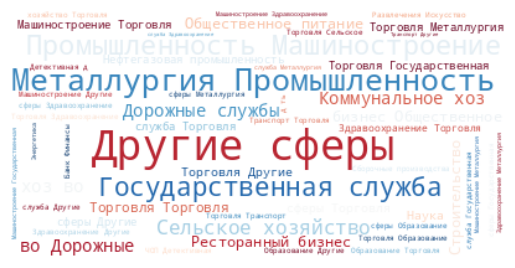

In [13]:
from wordcloud import WordCloud

industries = ','.join([word for word in clients_extended.gen_industry.values.tolist() if word == word])

wordcloud = WordCloud(background_color='white', colormap='RdBu_r').generate(industries)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
employment_proportion = (
    clients_extended
    .employment_status
    .value_counts(normalize=True)
    .to_frame('proportion')
    .assign(proportion=lambda df: df['proportion'] * 100)
    .reset_index()
    .assign(employment='Занятость')
)

fig = (
    px.pie(
        data_frame=employment_proportion,
        values='proportion',
        names='employment_status',
        color_discrete_sequence=color_sequence,
        template='simple_white',
        # # color='employment_status',
        # labels={
        #     'employment_status':'Занятость'
        # },
        width=600, 
        height=400,
        hole=0.8
    )
    .update_traces(textposition='auto')
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        xaxis={
            'visible': False, 
        },
        yaxis={
            'visible': False, 
        },
        hovermode=False,
        uniformtext_minsize=100
    )
)


fig.show()

In [17]:
family_incomes = (
    (
    clients_extended
    .family_income
    .value_counts(normalize=True) * 100
    )
    .to_frame('proportion')
    .reset_index()
    .sort_values('proportion')
)

fig = (
    px.bar(
        data_frame=family_incomes,
        x='proportion',
        y='family_income',
        color_discrete_sequence=color_sequence,
        template='simple_white',
        text=[f'{prop:.2f}%' for prop in family_incomes['proportion']],
    )
    .update_traces(textposition='outside')
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        xaxis={
            'visible': False, 
        },
        legend={
            'yanchor': "bottom",
            'xanchor': "right",
            'y': 0.01,
            # 'x': 0.01
        }
    )
)

fig.show()

In [19]:
def plot_income_factor(col, label):

    fig = (
        px.scatter(
            data_frame=clients_extended,
            x=col,
            y='personal_income',
            # color='gender_desc',
            template='simple_white',
            color_discrete_sequence=color_sequence,
            # labels={
            #     'gender_desc': 'Пол',
            # }
        )
        .update_layout(
            xaxis_title_text = label, 
            yaxis_title_text = 'Зароботная плата',
            legend={
                # 'yanchor': "bottom",
                # 'xanchor': "right",
                'y': 0.99,
                'x': 0.90
            }
        )
    )

    return fig

In [23]:
clients_extended.work_time.value_counts()

work_time
36.0     1263
24.0     1140
60.0      989
12.0      861
48.0      800
         ... 
234.0       1
104.0       1
864.0       1
860.0       1
303.0       1
Name: count, Length: 302, dtype: int64

In [35]:
target_proportion = (
        clients_extended
        .target
        .map({1:'Есть отклик', 0: 'Нет отклика'})
        .value_counts(normalize=True)
        .to_frame('proportion')
        .assign(proportion=lambda df: df['proportion'] * 100)
        .reset_index()
    )


fig = (
    px.pie(
        data_frame=target_proportion,
        values='proportion',
        names='target',
        color_discrete_sequence=color_sequence,
        template='simple_white',
        # # color='employment_status',
        width=600, 
        height=400,
        hole=0.8
    )
    .update_traces(textposition='auto')
    .update_layout(
        xaxis_title_text = '', 
        yaxis_title_text = '',
        xaxis={
            'visible': False, 
        },
        yaxis={
            'visible': False, 
        },
        hovermode=False,
        uniformtext_minsize=100
    )
)

fig.show()

In [48]:
clients_extended.total

id  age  gender            education      marital_status  \
0      106805103   42       1              Среднее  Не состоял в браке   
1      106809308   28       1  Среднее специальное      Состою в браке   
2      106805867   64       0  Среднее специальное      Состою в браке   
3      106808779   54       1  Среднее специальное      Состою в браке   
4      106814289   26       0  Среднее специальное      Состою в браке   
...          ...  ...     ...                  ...                 ...   
15995  106814680   26       1              Среднее  Не состоял в браке   
15996  106812464   26       0  Среднее специальное      Состою в браке   
15997  106809255   30       1  Среднее специальное  Не состоял в браке   
15998  106814593   25       0  Среднее специальное      Состою в браке   
15999  106813640   26       1               Высшее  Не состоял в браке   

       child_total  dependants  socstatus_work_fl  socstatus_pens_fl  \
0                1           0                  1                  0   
1                1           1                  1                  0   
2                2           0                  1                  1   
3                0           0                  1                  0   
4                1           1                  1                  0   
...            ...         ...                ...                ...   
15995            1           1                  1                  0   
15996            0           0                  1                  0   
15997            0           0                  1                  0   
15998            0           0                  1                  0   
15999            0           0                  1                  0   

        reg_address_province  ... personal_income            gen_industry  \
0         Московская область  ...         25000.0            Другие сферы   
1          Читинская область  ...         10000.0                Торговля   
2          Иркутская область  ...         30000.0            Другие сферы   
3      Новосибирская область  ...         25000.0  Государственная служба   
4          Красноярский край  ...         15000.0            Другие сферы   
...                      ...  ...             ...                     ...   
15995                Чувашия  ...          8000.0  Сборочные производства   
15996                Карелия  ...         12000.0                Торговля   
15997   Белгородская область  ...          9000.0                Торговля   
15998     Кабардино-Балкария  ...         12000.0               Транспорт   
15999              Татарстан  ...         10500.0            Другие сферы   

                        gen_title                        job_dir work_time  \
0            Работник сферы услуг  Участие в основ. деятельности       3.0   
1                      Специалист  Участие в основ. деятельности       5.0   
2      Руководитель высшего звена  Участие в основ. деятельности     360.0   
3                      Специалист  Участие в основ. деятельности       3.0   
4                      Специалист  Участие в основ. деятельности      12.0   
...                           ...                            ...       ...   
15995                  Специалист  Участие в основ. деятельности      36.0   
15996                  Специалист  Участие в основ. деятельности      24.0   
15997                  Специалист  Участие в основ. деятельности      36.0   
15998                  Специалист  Участие в основ. деятельности      36.0   
15999                     Рабочий    Вспомогательный техперсонал      12.0   

       agreement_rk target gender_desc employment_status  retirement_status  
0        60099204.0    1.0     Мужчина          Работает      Есть квартира  
1        62244665.0    0.0     Мужчина          Работает       Нет квартиры  
2        61050759.0    0.0     Женщина          Работает       Нет квартиры  
3        62079659.0    0.0     Мужчина          Работает      Есть квартира  
4       

In [52]:
(
    clients_extended
            .groupby('target')['child_total']
            .value_counts(normalize=True)
            .sort_index()
            .to_frame('proportion')
            .reset_index()
            .pivot(index='child_total', columns='target', values='proportion')
).columns

Index([0.0, 1.0], dtype='float64', name='target')